c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\threading.py", line 992, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\janna\miniconda3\envs\data_analysis\Lib\subprocess.py", line 1612, in _readerthread
    buffer.append(fh.read())
                  ~~~~~~~^^
  File "<frozen codecs>", line 325, in decode
UnicodeDeco

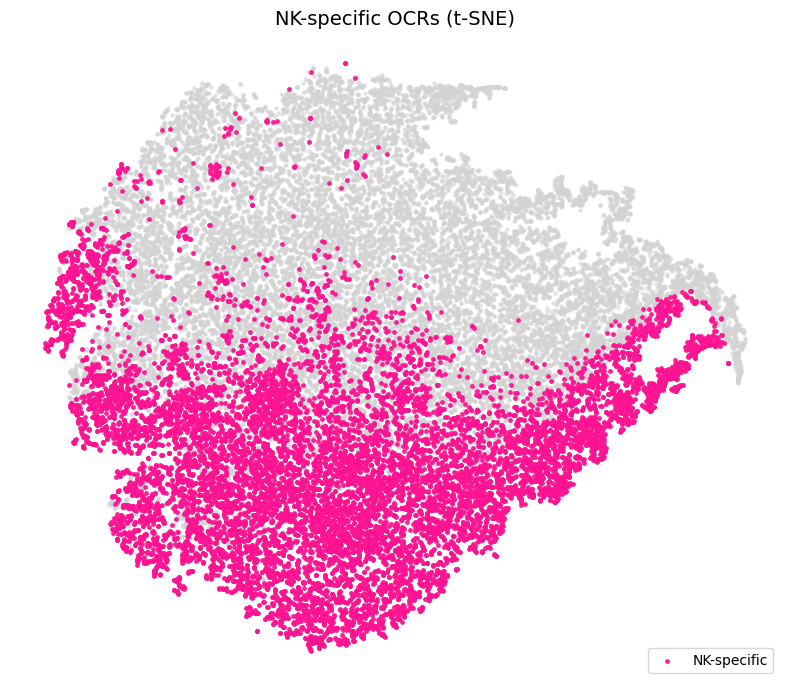

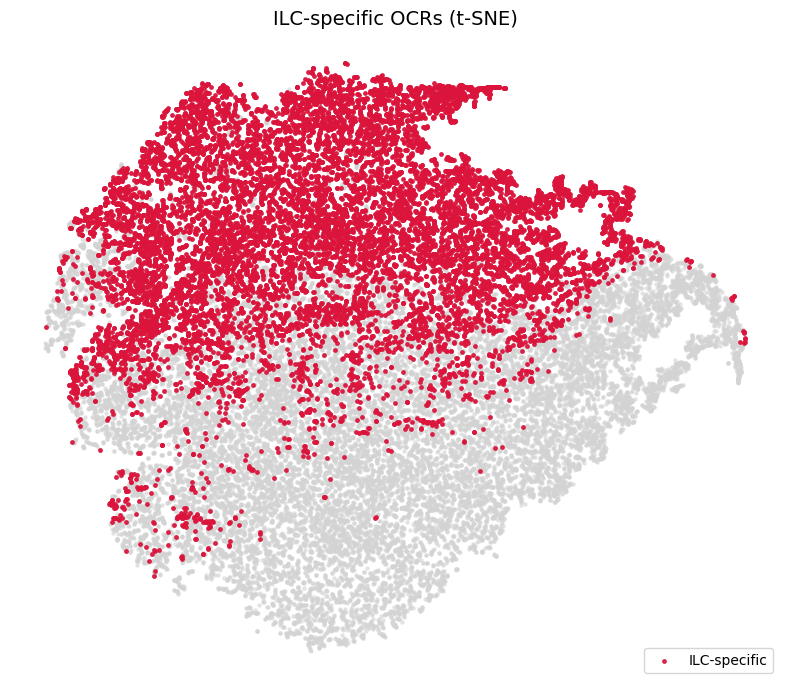

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Load data
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# 2. Extract NK and ILC columns
nk_cols = ["NK.27+11b-.BM","NK.27+11b+.BM","NK.27-11b+.BM","NK.27+11b-.Sp","NK.27+11b+.Sp","NK.27-11b+.Sp"]
ilc_cols = ["ILC2.SI","ILC3.NKp46-CCR6-.SI","ILC3.NKp46+.SI","ILC3.CCR6+.SI"]

# Extract ATAC signal
df_signal = df_raw[nk_cols + ilc_cols]
df_sample = df_signal.sample(n=40000, random_state=42)

# 3. Define cell-type specificity
def get_specificity(row):
    nk_max = row[nk_cols].max()
    ilc_max = row[ilc_cols].max()
    nk_mean = row[nk_cols].mean()
    ilc_mean = row[ilc_cols].mean()
    
    if nk_max > ilc_max and nk_max > 2 * ilc_mean:
        return "NK"
    elif ilc_max > nk_max and ilc_max > 2 * nk_mean:
        return "ILC"
    else:
        return "Other"

cell_specificity = df_sample.apply(get_specificity, axis=1)

# 4. Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df_sample.fillna(0))

# 5. Plot NK specific
plt.figure(figsize=(8, 7))

# Plot all OCRs in gray
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
            c="lightgray", s=5, alpha=0.5, label="_nolegend_")

# Overlay NK-specific OCRs in pink
idx_nk = cell_specificity == "NK"
plt.scatter(tsne_results[idx_nk, 0], tsne_results[idx_nk, 1], 
            c="deeppink", s=6, alpha=0.9, label="NK-specific")

plt.title("NK-specific OCRs (t-SNE)", fontsize=14)
plt.axis("off")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
# 5. Plot ILC specific
plt.figure(figsize=(8, 7))

# Plot all OCRs in gray
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
            c="lightgray", s=5, alpha=0.5, label="_nolegend_")

idx_ilc = cell_specificity == "ILC"
plt.scatter(tsne_results[idx_ilc, 0], tsne_results[idx_ilc, 1], 
            c="crimson", s=6, alpha=0.9, label="ILC-specific")
plt.title("ILC"
"-specific OCRs (t-SNE)", fontsize=14)
plt.axis("off")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


t-SNE is then used to project the high-dimensional data into two dimensions. Finally, separate plots highlight NK- and ILC-specific OCRs against a gray background of all OCRs to visualize lineage-specific regulatory regions.

The first plot shows NK-specific OCRs highlighted in pink. These points form a distinct and continuous region within the t-SNE projection, suggesting that NK-specific CREs cluster together in accessibility space. This supports the idea that NK cells use a distinct regulatory program reflected in their chromatin landscape.

The second plot highlights ILC-specific OCRs in red. Again, these OCRs cluster in a different region of the map than NK-specific elements, demonstrating that ILCs also have a distinct set of regulatory regions. The separation between NK- and ILC-specific OCRs in the t-SNE space indicates that each lineage has a characteristic accessibility signature.
